# 1. DATASET LOADING

The NSL-KDD datset is loaded after importing necessary libraries and algorithms 

# 1.1 Import necessary libraries

In [2]:
# Load data processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [3]:
# Load machine learning libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# 1.2 Loading the dataset

In [4]:
# Loading the data from the train and test files
train_nt_df = pd.read_csv('datasets/train_nt_data.csv')
test_nt_df = pd.read_csv('datasets/test_nt_data.csv')

# Datasets information

In [5]:
# Print total size
print("Test set size: ", test_nt_df.shape)
print("Train set size: ", train_nt_df.shape)



Test set size:  (22544, 41)
Train set size:  (25192, 42)


# 2.0  Data preprocessing

# Training dataset information

In [6]:
train_nt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
train_nt_df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [8]:
def training_set_info(df):
    print ("Training Dataset Shape", df.shape)
    print()
    print("Training Dataset column info", df.columns)

training_set_info(train_nt_df)

Trainig Dataset Shape (25192, 42)

Trainig Dataset column info Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


# Dataset Structure

In [9]:
train_nt_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# Checking for missing Data

In [10]:
# Check for missing values
print('==== Train data ====')
print(train_nt_df.isnull().sum())
print()
print('==== Test data ====')
print(test_nt_df.isnull().sum())
print()

==== Train data ====
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate         

# 3.0 Data Analysis

In [11]:
train_nt_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# Distribution of target variable

<AxesSubplot:xlabel='class', ylabel='count'>

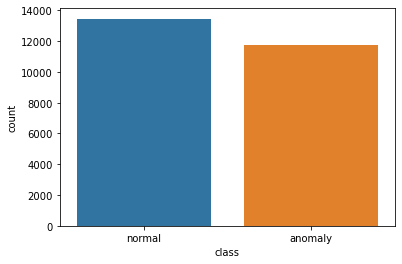

In [12]:
# Show the distribution of the target variable
sns.countplot(x='class', data=train_nt_df)

# Count the number of unique protocol_type


In [13]:
# Count the number of unique protocol_type
train_nt_df['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

# Show protocol_type distribution for kind of class


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

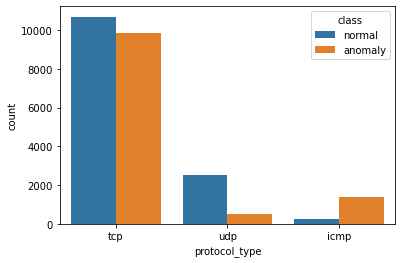

In [14]:
# Show protocol_type distribution for kind of class
sns.countplot(x='protocol_type', hue='class', data=train_nt_df)

In [17]:
# Find unique hosts (IP addresses) in the train and test data
train_src_hosts = train_nt_df['protocol_type'].unique()
train_dst_hosts = train_nt_df['protocol_type'].unique()
train_hosts = np.union1d(train_src_hosts, train_dst_hosts)

# For each host, count the number of flows
print('Number of unique hosts in the train data: ', len(train_hosts))

# Find unique hosts (IP addresses) in the train and test data
test_src_hosts = test_nt_df['protocol_type'].unique()
test_dst_hosts = test_nt_df['protocol_type'].unique()
test_hosts = np.union1d(test_src_hosts, test_dst_hosts)

# Floor ratio of hosts in test data that are not in train data
ratio = math.floor((1.0-len(test_hosts)/len(train_hosts)) * 100)

# For each host, count the number of flows
print("Number of unique hosts in the test data: {} (~{}% smaller)".format(len(test_hosts), ratio))


Number of unique hosts in the train data:  3
Number of unique hosts in the test data: 3 (~0% smaller)


In [40]:
# Revoked columns
revoked_columns = [
  'protocol_type', 
  'service', 
  'flag',
]

# # Create dummy columns for the ALERT column
# alert_dummies = pd.get_dummies(train_df['ALERT'], prefix='ALERT', drop_first=True)

# Copy + drop the revoked columns
train_nt_df = train_nt_df.copy().drop(revoked_columns, axis=1)

# Splitting the training set

In [41]:
def split_maintain_distribution(X, y):
  sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=9)
  indexes = sss.split(X, y)
  train_indices, test_indices = next(indexes)
  return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]



In [42]:
X_train, X_val, y_train, y_val = split_maintain_distribution(train_nt_df.drop('class', axis=1), train_nt_df['class'])

In [43]:
print(X_train)
print()

print("X VAL")
print(X_val)
print()

print("Y TRAIN")
print(y_train)
print()

print("Y VAL")
print(y_val)
print()

       duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
25175        10        139       2257     0               0       0    0   
4269          0          0          0     0               0       0    0   
1667          0        313       2698     0               0       0    0   
19506         0       1032          0     0               0       0    0   
20982         0          0          0     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
19116         0          0          0     0               0       0    0   
10389         0          0          0     0               0       0    0   
10783         0          0          0     0               0       0    0   
9485          0         78          0     0               0       0    0   
16981         0        205        182     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  dst_host_count  \
25175     

# Print distribution of the target variable in the train and validation sets


In [44]:
# Print distribution of the target variable in the train and validation sets
print('Train set distribution:')
print(y_train.value_counts(normalize=True))
print()
print('Validation set distribution:')
print(y_val.value_counts(normalize=True))

Train set distribution:
normal     0.533866
anomaly    0.466134
Name: class, dtype: float64

Validation set distribution:
normal     0.533836
anomaly    0.466164
Name: class, dtype: float64


# Data Scaling

In [46]:
# Fix scaler on train set
scaler = StandardScaler()
fitter = scaler.fit(X_train)

# Scale train and validation sets
x_train_scaled = fitter.transform(X_train)
x_validation_scaled = fitter.transform(X_val)

# Convert to pandas dataframe
df_feat_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)
df_feat_validation = pd.DataFrame(x_validation_scaled, columns=X_val.columns)

# Creating and fitting into model

In [47]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100) # 100 trees = default value

# Fit the model
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier()

# Print features importance

In [51]:
# Print features importance
feature_importances = pd.DataFrame(
    rfc.feature_importances_,
    index=X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)
print(feature_importances)

                             importance
dst_bytes                      0.171788
src_bytes                      0.155890
dst_host_srv_count             0.081002
same_srv_rate                  0.078897
dst_host_same_srv_rate         0.059635
diff_srv_rate                  0.059465
logged_in                      0.059369
count                          0.047759
dst_host_diff_srv_rate         0.037662
dst_host_same_src_port_rate    0.036986
dst_host_count                 0.027770
dst_host_srv_diff_host_rate    0.025058
srv_count                      0.022711
dst_host_serror_rate           0.018863
srv_serror_rate                0.016863
serror_rate                    0.016090
dst_host_srv_serror_rate       0.014420
dst_host_rerror_rate           0.012196
dst_host_srv_rerror_rate       0.010468
hot                            0.008806
rerror_rate                    0.008535
srv_rerror_rate                0.006634
num_compromised                0.006012
wrong_fragment                 0.005111


# Plot feature importance

<AxesSubplot:ylabel='importance'>

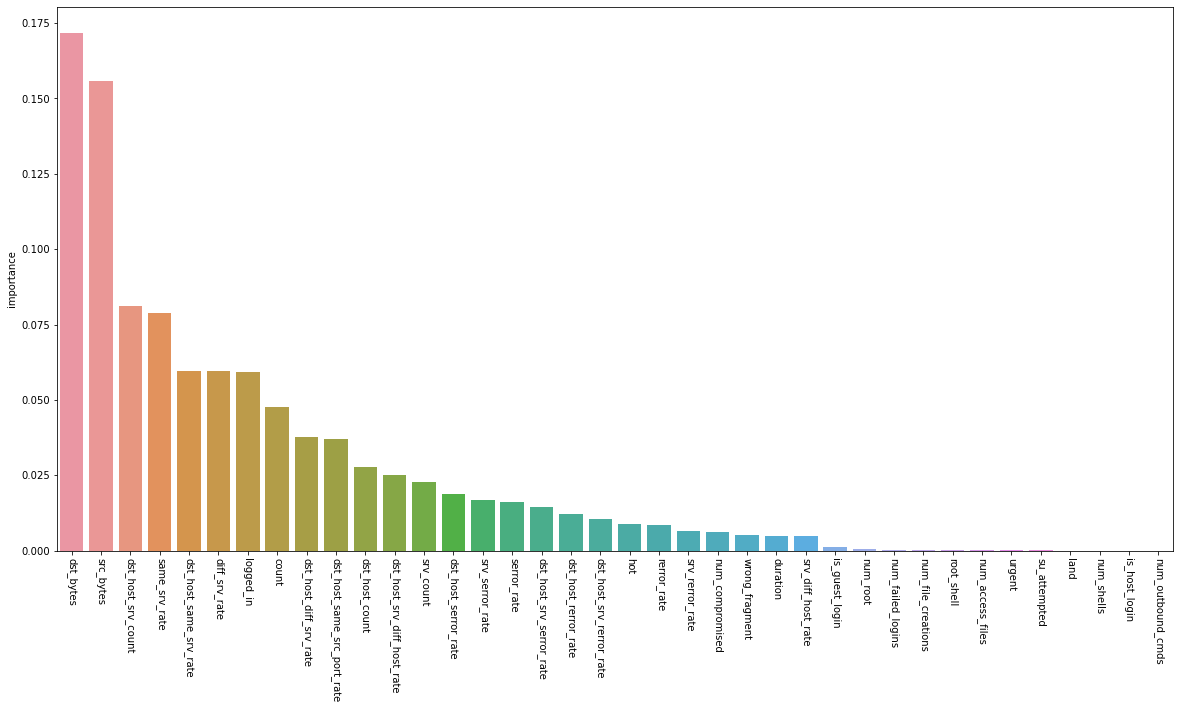

In [52]:
# Plot feature importance
plt.figure(figsize=(20, 10))
plt.xticks(rotation=-90)
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])

In [55]:
MIN_IMPORTANCE_THRESHOLD = 0.01

In [56]:
# Select all columns with importance > 0.02
COLUMNS = feature_importances[feature_importances['importance'] > MIN_IMPORTANCE_THRESHOLD].index
COLUMNS

Index(['dst_bytes', 'src_bytes', 'dst_host_srv_count', 'same_srv_rate',
       'dst_host_same_srv_rate', 'diff_srv_rate', 'logged_in', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_count', 'dst_host_srv_diff_host_rate', 'srv_count',
       'dst_host_serror_rate', 'srv_serror_rate', 'serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

# Resplitting the dataset

In [58]:
X_train, X_val, y_train, y_val = split_maintain_distribution(
  train_nt_df[COLUMNS],
  train_nt_df['class']
)

# Rescalling the dataset with new features

In [63]:
# Fix scaler on train set
scaler = StandardScaler()
fitter = scaler.fit(X_train)

# Scale train and validation sets
x_train_scaled = fitter.transform(X_train)
x_validation_scaled = fitter.transform(X_val)

# Convert to pandas dataframe
df_feat_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)
df_feat_validation = pd.DataFrame(x_validation_scaled, columns=X_val.columns)

In [65]:
# test_nt_df

In [66]:
# No target variable, so no need to split the fit and transform
x_test_scaled = StandardScaler().fit_transform(test_nt_df[COLUMNS])
# Convert to pandas dataframe
df_feat_test = pd.DataFrame(x_test_scaled, columns=test_nt_df[COLUMNS].columns)

In [67]:
df_feat_test

,dst_bytes,src_bytes,dst_host_srv_count,same_srv_rate,dst_host_same_srv_rate,diff_srv_rate,logged_in,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_count,dst_host_srv_diff_host_rate,srv_count,dst_host_serror_rate,srv_serror_rate,serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.096896,-0.021988,-1.169697,-1.697859,-1.305370,-0.131492,-0.890373,1.166764,-0.138370,-0.431856,0.650093,-0.229980,-0.237191,-0.358118,-0.347390,-0.348468,-0.35275,1.979791,1.929116
1,-0.096896,-0.021988,-1.250212,-1.770589,-1.397181,-0.131492,-0.890373,0.443234,-0.138370,-0.431856,0.650093,-0.229980,-0.338246,-0.358118,-0.347390,-0.348468,-0.35275,1.979791,1.929116
2,-0.096896,0.005473,-0.489800,0.629488,0.002934,-0.363035,-0.890373,-0.607053,-0.228985,1.559906,-0.636681,0.004234,-0.338246,-0.358118,-0.347390,-0.348468,-0.35275,-0.602719,-0.565483
3,-0.096896,-0.021946,-0.749234,0.629488,0.898090,-0.363035,-0.890373,-0.607053,-0.410217,2.833328,-2.029801,3.049016,0.380366,-0.358118,-0.347390,-0.348468,-0.35275,-0.602719,-0.565483
4,-0.096189,-0.021988,-0.489800,0.629488,-0.685647,-0.363035,-0.890373,-0.607053,0.360018,-0.333901,-1.753304,0.004234,-0.259648,-0.358118,0.054856,-0.348468,-0.35275,1.540764,1.205682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.081202,-0.020309,0.002232,0.629488,0.255414,-0.363035,1.123125,-0.607053,-0.138370,-0.399204,-0.998254,-0.112873,-0.338246,-0.321505,-0.347390,-0.348468,-0.35275,-0.602719,-0.565483
22540,-0.052690,-0.021318,1.022079,0.629488,0.898090,-0.363035,1.123125,-0.599273,-0.410217,-0.399204,0.033292,-0.112873,-0.225963,-0.321505,-0.347390,-0.348468,-0.35275,-0.602719,-0.565483
22541,0.294926,0.093373,1.022079,0.629488,0.898090,-0.363035,1.123125,-0.575933,-0.410217,-0.431856,0.650093,-0.229980,-0.237191,-0.358118,-0.347390,-0.348468,-0.35275,-0.421943,-0.390861
22542,-0.094917,-0.021899,0.995240,0.629488,0.875137,-0.363035,-0.890373,-0.583713,-0.364909,-0.431856,0.650093,-0.229980,-0.282104,-0.358118,-0.347390,-0.348468,-0.35275,-0.602719,-0.565483


# # Create grid search parameters for Support vector machine (model training

In [68]:
# Create grid search parameters
param_grid = {
  'C': [0.1, 1, 10, 100, 1000],
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

# Create grid search
svc_grid = GridSearchCV(
  SVC(kernel="rbf"),
  param_grid,
  cv=2, # Only 2 folds because of the size of the dataset, otherwise it takes too long
  n_jobs=-1, # Use all cores
)

# Fit grid search
svc_grid.fit(x_train_scaled, y_train)

# Print information about the model
print(f"Best params: {svc_grid.best_params_}")
print(f"Best score: {svc_grid.best_score_}")

Best params: {'C': 100, 'gamma': 1}
Best score: 0.9866521482480888


In [69]:
# Create SVM with best parameters
svc = SVC(
  kernel='rbf',
  C=svc_grid.best_params_['C'],
  gamma=svc_grid.best_params_['gamma'],
)
svc.fit(x_train_scaled, y_train)

SVC(C=100, gamma=1)

# Make predictions on validation set

In [75]:
# Make predictions on validation set
predictions = svc.predict(x_validation_scaled)

# Print the classification report (SVM)

In [76]:
# Print the classification report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2349
      normal       0.99      0.99      0.99      2690

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



Using seaborn to visualize the confusion matrix on SVM



<AxesSubplot:>

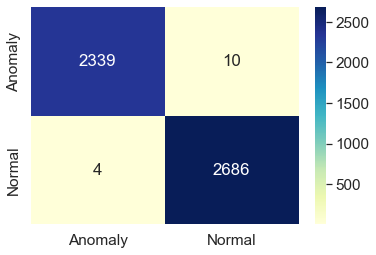

In [85]:
# Rename the columns and index for the confusion matrix
cmat = confusion_matrix(y_val, predictions)
cmat = pd.DataFrame(cmat, index=['Anomaly', 'Normal'], columns=['Anomaly', 'Normal'])

# Use seaborn to visualize the confusion matrix
print("Using seaborn to visualize the confusion matrix on SVM")
print()
sns.set(font_scale=1.4) # for label size
sns.heatmap(cmat, annot=True, fmt='d', cmap='YlGnBu')

# Prediction on the test set

normal     20310
anomaly     2234
dtype: int64

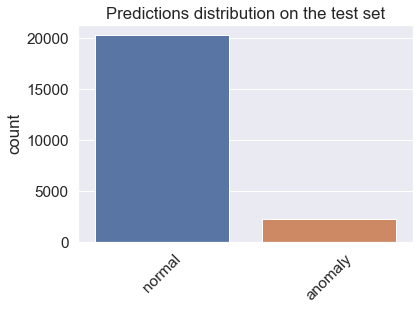

In [79]:
# Prediction on the test set
predictions = svc.predict(x_test_scaled)


# Show the predictions on a histogram
fig = sns.countplot(x=predictions)
fig.set_title('Predictions distribution on the test set') # Set the title
fig.set_xticklabels(fig.get_xticklabels(), rotation=45) # Rotate x-labels
pd.Series(predictions).value_counts() # Print the predictions size per class

# Random Forest Classifier Training

In [80]:
# Create random forest classifier
rfc = RandomForestClassifier()

# Create a dictionary of all values we want to test for n_estimators
parameters = {'n_estimators': [1, 2, 4, 10, 15, 20, 30, 40, 50, 100, 200, 500, 1000]}

# Used to find the best n_estimators value to use to train the model
rfc_grid = GridSearchCV(
  rfc,
  parameters,
  scoring='accuracy',
  cv=2, # Only 2 folds because of the size of the dataset, otherwise it takes too long
  n_jobs=-1 # Use all cores
)

# Fit model to data
rfc_grid.fit(x_train_scaled, y_train)

# Extract best params
print(f"Best params: {rfc_grid.best_params_}")
print(f"Best score: {rfc_grid.best_score_}")

Best params: {'n_estimators': 50}
Best score: 0.9950379300505598


In [81]:
rfc = RandomForestClassifier(n_estimators=rfc_grid.best_params_['n_estimators'])
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

In [82]:
# Make predictions on validation set
predictions = rfc.predict(x_validation_scaled)

# Print the classification report (RF)

In [83]:
# Print the classification report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2349
      normal       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



Using seaborn to visualize the confusion matrix on RF


<AxesSubplot:>

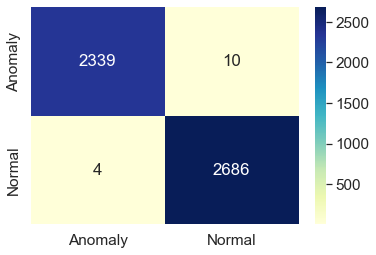

In [86]:
# Rename the columns and index for the confusion matrix
cmat = confusion_matrix(y_val, predictions)
cmat = pd.DataFrame(cmat, index=['Anomaly', 'Normal'], columns=['Anomaly', 'Normal'])

# Use seaborn to visualize the confusion matrix
print("Using seaborn to visualize the confusion matrix on RF")
sns.set(font_scale=1.4) # for label size
sns.heatmap(cmat, annot=True, fmt='d', cmap='YlGnBu')

normal     11997
anomaly    10547
dtype: int64

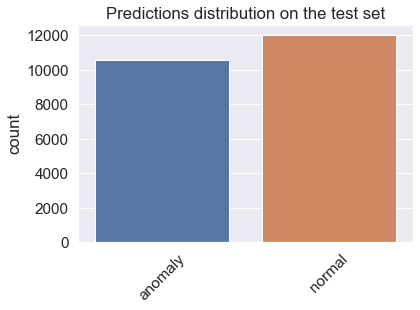

In [87]:
# Prediction on the test set
predictions = rfc.predict(x_test_scaled)

# Show the predictions on a histogram
fig = sns.countplot(x=predictions)
fig.set_title('Predictions distribution on the test set') # Set the title
fig.set_xticklabels(fig.get_xticklabels(), rotation=45) # Rotate x-labels
pd.Series(predictions).value_counts() # Print the predictions size per class